# Tabular Playground Series Sep 2022

For this challenge, you will be predicting a full year worth of sales for 4 items from two competing stores located in six different countries. This dataset is completely fictional, but contains many effects you see in real-world data, e.g., weekend and holiday effect, seasonality, etc. You are given the challenging task of predicting book sales during the year 2021.

#### Data

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [20]:
train_data_row, train_data_col = train_data.shape
print('Total rows: ', train_data_row)
print('Total columns: ', train_data_col)

Total rows:  70128
Total columns:  6


In [21]:
train_data.head()

,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240


In [22]:
train_data.tail()

,row_id,date,country,store,product,num_sold
70123,70123,2020-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,614
70124,70124,2020-12-31,Spain,KaggleRama,Kaggle Advanced Techniques,215
70125,70125,2020-12-31,Spain,KaggleRama,Kaggle Getting Started,158
70126,70126,2020-12-31,Spain,KaggleRama,Kaggle Recipe Book,135
70127,70127,2020-12-31,Spain,KaggleRama,Kaggle for Kids: One Smart Goose,202


## Data Understanding

In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   row_id    70128 non-null  int64 
 1   date      70128 non-null  object
 2   country   70128 non-null  object
 3   store     70128 non-null  object
 4   product   70128 non-null  object
 5   num_sold  70128 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 3.2+ MB


In [24]:
train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])

In [25]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
row_id,70128.0,35063.500000,20244.354176,0.0,17531.75,35063.5,52595.25,70127.0
num_sold,70128.0,194.296986,126.893874,19.0,95.00,148.0,283.00,986.0


In [26]:
print("duplicated data :", train_data.duplicated().sum())
print("null data : ", train_data.isnull().sum().sum())

duplicated data : 0
null data :  0


In [27]:
for col in train_data.columns:
    print(col, len(train_data[col].unique()))

row_id 70128
date 1461
country 6
store 2
product 4
num_sold 699


### EDA

Text(0.5, 1.0, 'Total Store Sales')

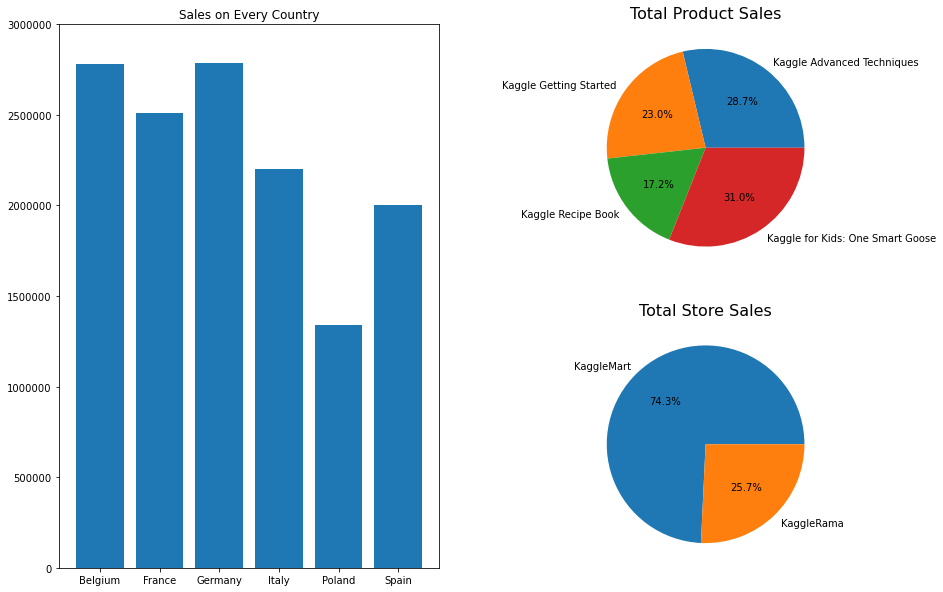

In [28]:
sold_product = train_data.groupby(['product'])['num_sold'].sum()
sold_store = train_data.groupby(['store'])['num_sold'].sum()
sold_country = train_data.groupby(['country'])['num_sold'].sum()

fig = plt.figure(figsize=(15,10))
fig.set_facecolor('white')

ax1 = fig.add_subplot(1, 2, 1)
ax1.bar(sold_country.keys(), sold_country.values)
ax1.set_title('Sales on Every Country')
ax1.ticklabel_format(style='plain', axis='y')
ax1.set_ylim(0, 3e6)

ax2 = fig.add_subplot(2, 2, 2)
ax2.pie(sold_product.values, labels=sold_product.keys(), autopct="%.1f%%")
ax2.set_title('Total Product Sales', fontsize=16)

ax3 = fig.add_subplot(2, 2, 4)
ax3.pie(sold_store.values, labels=sold_store.keys(), autopct="%.1f%%")
ax3.set_title('Total Store Sales', fontsize=16)

Text(0.5, 1.0, 'Product Sales by Store')

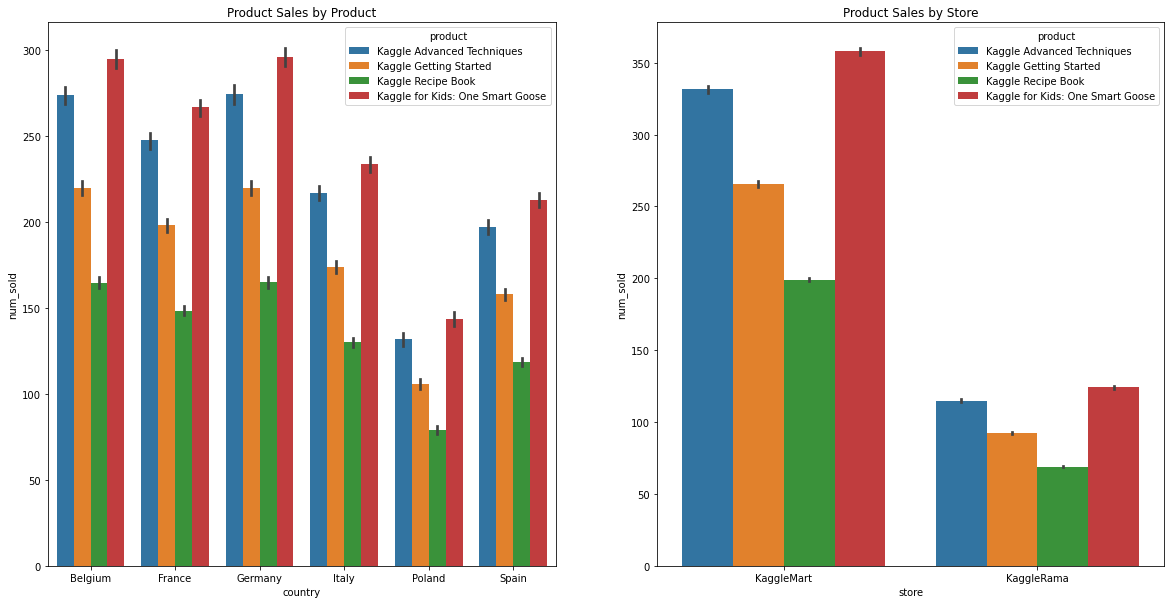

In [29]:
fig = plt.figure(figsize=(20,10))
fig.set_facecolor('white')

ax1 = fig.add_subplot(1, 2, 1)
sns.barplot(data=train_data, x='country', y='num_sold', hue='product')
ax1.set_title('Product Sales by Product')

ax2 = fig.add_subplot(1, 2, 2)
sns.barplot(data=train_data, x='store', y='num_sold', hue='product')
ax2.set_title("Product Sales by Store")

Text(0.5, 1.0, 'Time Series of Sales per Store')

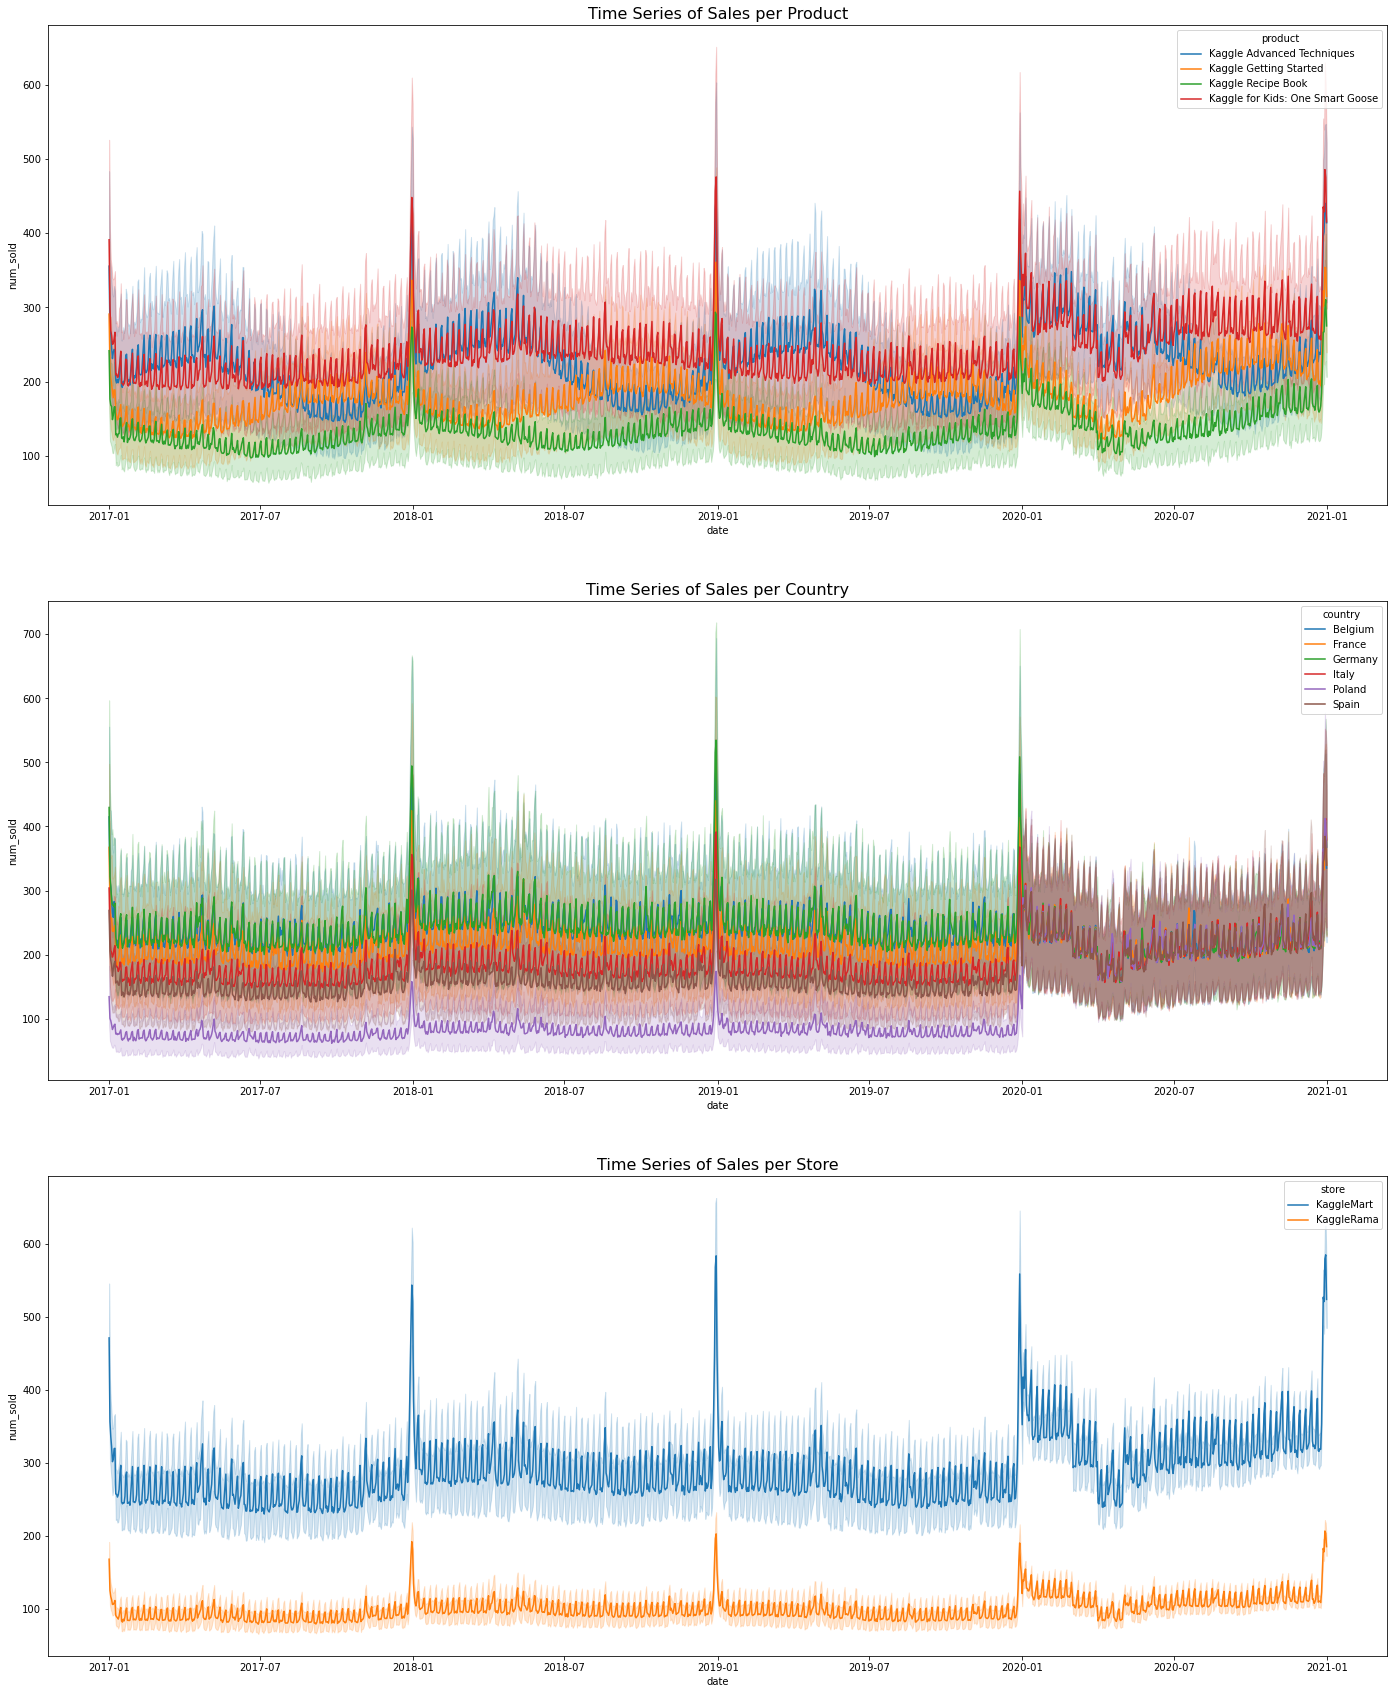

In [30]:
fig = plt.figure(figsize=(24,30))
fig.set_facecolor('white')

ax1 = fig.add_subplot(3, 1, 1)
sns.lineplot(data=train_data,x='date',y='num_sold',hue='product')
ax1.set_title("Time Series of Sales per Product",fontsize=16)

ax1 = fig.add_subplot(3, 1, 2)
sns.lineplot(data=train_data,x='date',y='num_sold',hue='country')
ax1.set_title("Time Series of Sales per Country",fontsize=16)

ax1 = fig.add_subplot(3, 1, 3)
sns.lineplot(data=train_data,x='date',y='num_sold',hue='store')
ax1.set_title("Time Series of Sales per Store",fontsize=16)

## Preprocessing

In [31]:
# Format date col

def format_date(df):
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['dayOfYear'] = df['date'].dt.dayofyear
    df['weekday'] = df['date'].dt.weekday
    return df

train_data = format_date(train_data)
test_data = format_date(test_data)

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['country', 'store', 'product']
for col in cols:
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.transform(test_data[col])

In [33]:
train_data = train_data.drop(['date', 'row_id'], axis=1)
test_data = test_data.drop(['date', 'row_id'], axis=1)

In [34]:
train_data.head()

,country,store,product,num_sold,year,month,day,dayOfYear,weekday
0,0,0,0,663,2017,1,1,1,6
1,0,0,1,615,2017,1,1,1,6
2,0,0,2,480,2017,1,1,1,6
3,0,0,3,710,2017,1,1,1,6
4,0,1,0,240,2017,1,1,1,6


In [35]:
test_data.head()

,country,store,product,year,month,day,dayOfYear,weekday
0,0,0,0,2021,1,1,1,4
1,0,0,1,2021,1,1,1,4
2,0,0,2,2021,1,1,1,4
3,0,0,3,2021,1,1,1,4
4,0,1,0,2021,1,1,1,4


## Modeling

In [36]:
import lightgbm as lgbm
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV , cross_val_score ,cross_validate

In [37]:
X = train_data.drop('num_sold', axis=1)
y = train_data['num_sold'] 

In [38]:
lgb = LGBMRegressor(random_state=42, boosting_type='dart')
cb = CatBoostRegressor(random_state=42, verbose=0)

models = [lgb, cb]

In [39]:
def get_scores(cv_scores):
    scores = np.zeros(test_data.shape[0])
    for estimator in cv_scores['estimator']:
        scores += estimator.predict(test_data)
    scores /= len(cv_scores['estimator'])
    return scores

In [40]:
def smape(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)

smape_score = make_scorer(smape, greater_is_better=False)

scalar = StandardScaler()

res = pd.DataFrame()
row_number = 0
results = []
names = []
prob_scores = []

for model in models:
    model_name=model.__class__.__name__
    pipeline = Pipeline([('transformer', scalar), ('estimator', model)])
    print(model_name, 'training')

    cv_results = cross_validate(pipeline, X, y, cv=42, scoring='neg_mean_absolute_error', return_train_score=True, return_estimator=True, n_jobs=-1)

    res.loc[row_number,'Model Name'] = model_name
    res.loc[row_number, 'Train Score Mean'] = cv_results['train_score'].mean()
    res.loc[row_number, 'Test Score Mean'] = cv_results['test_score'].mean()
    res.loc[row_number, 'Fit Time Mean'] = cv_results['fit_time'].mean()
    results.append(cv_results)
    names.append(model_name)
    prob_scores.append(get_scores(cv_results))

    row_number+=1

LGBMRegressor training
CatBoostRegressor training


In [41]:
display(res.style.background_gradient())

,Model Name,Train Score Mean,Test Score Mean,Fit Time Mean
0,LGBMRegressor,-20.793688,-21.951988,2.417905
1,CatBoostRegressor,-8.451395,-10.517780,32.753380
